In [1]:
from typing import List
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pprint import pprint
from mmengine import load
from pycocotools.coco import COCO

from utils import boxes_xywh2xyxy, box_xywh2xyxy, box_xyxy2xywh

In [2]:
coco_ins_train = COCO('../../annotations/instances_train.json')
coco_rel_train = COCO('../../annotations/relations_train.json')

coco_ins_test = COCO('../../annotations/instances_test.json')
coco_rel_test = COCO('../../annotations/relations_test.json')

coco_pasta_train = COCO('../../annotations/pastas_train.json')

loading annotations into memory...
Done (t=0.69s)
creating index...
index created!
loading annotations into memory...
Done (t=0.18s)
creating index...
index created!
loading annotations into memory...
Done (t=0.32s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


In [3]:
ins_categories = coco_ins_train.cats
rel_categories = coco_rel_train.cats
pasta_categories = coco_pasta_train.cats

In [7]:
font = cv2.FONT_HERSHEY_SIMPLEX
train_img_root = '../../images/train/'
test_img_root = '../../images/test/'
ins_label2cat = {i: cat['id'] for i, cat in enumerate(ins_categories.values())}
ins_cat2label = {cat['id']: i for i, cat in enumerate(ins_categories.values())}
palette = np.asarray([
    (220, 20, 60), (119, 11, 32), (0, 0, 142), (0, 0, 230), (106, 0, 228),
    (0, 60, 100), (0, 80, 100), (0, 0, 70), (0, 0, 192), (250, 170, 30),
    (100, 170, 30), (220, 220, 0), (175, 116, 175), (250, 0, 30),
    (165, 42, 42), (255, 77, 255), (0, 226, 252), (182, 182, 255),
    (0, 82, 0), (120, 166, 157), (110, 76, 0), (174, 57, 255),
    (199, 100, 0), (72, 0, 118), (255, 179, 240), (0, 125, 92),
    (209, 0, 151), (188, 208, 182), (0, 220, 176), (255, 99, 164),
    (92, 0, 73), (133, 129, 255), (78, 180, 255), (0, 228, 0),
    (174, 255, 243), (45, 89, 255), (134, 134, 103), (145, 148, 174),
    (255, 208, 186), (197, 226, 255), (171, 134, 1), (109, 63, 54),
    (207, 138, 255), (151, 0, 95), (9, 80, 61), (84, 105, 51),
    (74, 65, 105), (166, 196, 102), (208, 195, 210), (255, 109, 65),
    (0, 143, 149), (179, 0, 194), (209, 99, 106), (5, 121, 0),
    (227, 255, 205), (147, 186, 208), (153, 69, 1), (3, 95, 161),
    (163, 255, 0), (119, 0, 170), (0, 182, 199), (0, 165, 120),
    (183, 130, 88), (95, 32, 0), (130, 114, 135), (110, 129, 133),
    (166, 74, 118), (219, 142, 185), (79, 210, 114), (178, 90, 62),
    (65, 70, 15), (127, 167, 115), (59, 105, 106), (142, 108, 45),
    (196, 172, 0), (95, 54, 80), (128, 76, 255), (201, 57, 1),
    (246, 0, 122), (191, 162, 208)], dtype=float) / 255

In [9]:
def show_box(box, ax, info: dict = {}):
    x, y, w, h = box
    
    edgecolor = info.get('edgecolor', 'green')
    name = info.get('name', '')

    # ax.text(x0, y0, name, fontdict=font)
    ax.text(x, y, name)
    # 底色
    ax.add_patch(plt.Rectangle((x, y), w, h, edgecolor='white', facecolor=(0,0,0,0), lw=2))
    # 类别颜色
    ax.add_patch(plt.Rectangle((x, y), w, h, edgecolor=edgecolor, facecolor=(0,0,0,0), lw=1))

In [10]:
def watch(anns: List[dict], ax, categories: dict, title: str = '', with_name: bool = True):
    boxes = [ann['bbox'] for ann in anns]
    ax.set_title(title)
    ax.axis('off')
    for box, ann in zip(boxes, anns):
        cat = ann['category_id']
        info = dict(edgecolor=palette[ins_cat2label[cat]])
        if with_name:
            info['name'] = categories[cat]['name']
        show_box(box, ax, info=info)

### train

In [11]:
train_img_ids = coco_ins_train.getImgIds()

In [27]:
img_id = 33572 #  33572/23689
# img_id = train_img_ids[1000]
img_info = coco_ins_train.loadImgs(img_id)[0]
image = plt.imread(os.path.join(train_img_root, img_info['file_name']))

train_ins_anns = coco_ins_train.imgToAnns[img_id]
train_rel_anns = coco_rel_train.imgToAnns[img_id]

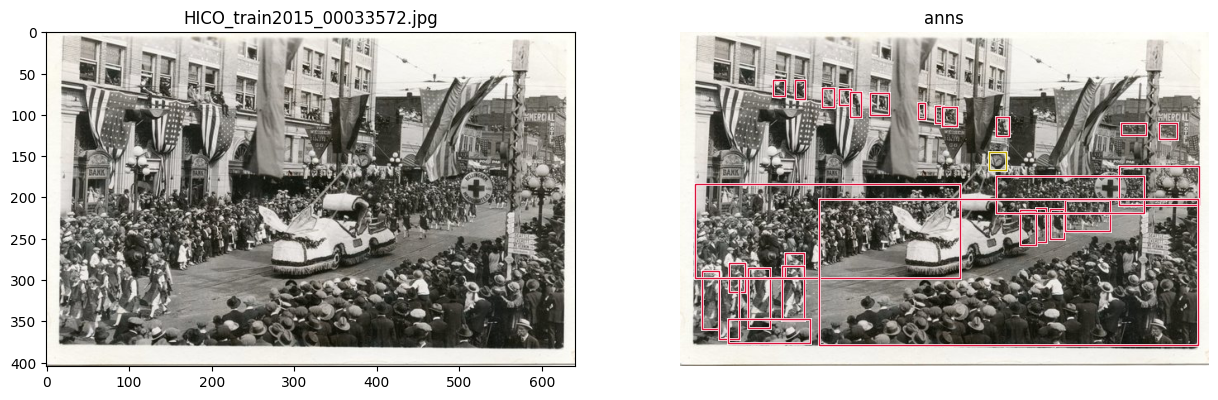

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title(img_info['file_name'])
axs[1].imshow(image)
watch(train_ins_anns, axs[1], ins_categories, title='anns', with_name=False)  # 

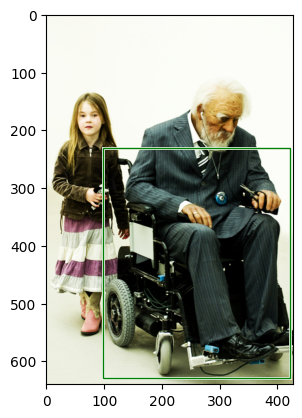

In [11]:
fig, ax = plt.subplots()
ax.imshow(image)
ann = train_ins_anns[0]
info = ins_categories[ann['category_id']]
print(info['name'])
show_box(ann['bbox'], ax, info=info)

In [11]:
ins_categories[19]

{'supercategory': 'animal', 'id': 19, 'name': 'horse'}

In [12]:
pprint(train_ins_anns, width=100, compact=True, sort_dicts=False)

[{'id': 59161, 'bbox': [136, 114, 284, 490], 'area': 139160, 'category_id': 1, 'image_id': 11368},
 {'id': 59162, 'bbox': [98, 231, 323, 397], 'area': 128231, 'category_id': 62, 'image_id': 11368}]


In [14]:
rel_categories[67]

{'id': 67, 'name': 'pick'}

In [15]:
pprint(train_rel_anns, width=100, compact=True, sort_dicts=False)

[{'id': 34850, 'subject_id': 59161, 'object_id': 59162, 'category_id': 88, 'image_id': 11368}]


### test

In [7]:
test_img_ids = coco_ins_test.getImgIds()

In [12]:
img_id = 2
# img_id = test_img_ids[1000]
img_info = coco_ins_test.loadImgs(img_id)[0]
test_image = plt.imread(os.path.join(test_img_root, img_info['file_name']))

test_ins_anns = coco_ins_test.imgToAnns[img_id]
test_rel_anns = coco_rel_test.imgToAnns[img_id]

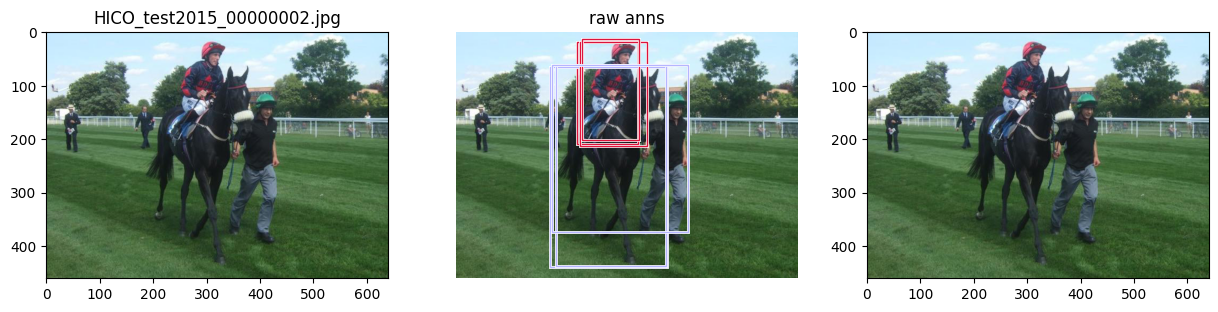

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(test_image)
axs[0].set_title(img_info['file_name'])
axs[1].imshow(test_image)
watch(test_ins_anns, axs[1], ins_categories, title='anns', with_name=False)  # 

In [20]:
ins_categories[19]

{'supercategory': 'animal', 'id': 19, 'name': 'horse'}

In [11]:
pprint(test_ins_anns, width=100, compact=True, sort_dicts=False)

[{'id': 10, 'bbox': [302, 182, 20, 54], 'area': 1080, 'category_id': 1, 'image_id': 3},
 {'id': 11, 'bbox': [234, 85, 210, 213], 'area': 44730, 'category_id': 9, 'image_id': 3}]


In [ ]:
rel_categories[2]

{'id': 2, 'name': 'assemble'}

In [10]:
pprint(test_rel_anns, width=100, compact=True, sort_dicts=False)

[{'id': 6, 'subject_id': 10, 'object_id': 11, 'category_id': 77, 'image_id': 3}]


## proposals

In [7]:
def preds2anns(preds):
    return [
        {
            'bbox': box_xyxy2xywh(bbox),
            'score': score,
            'category_id': ins_label2cat[label]
        }
        for bbox, score, label in zip(preds['bboxes'], preds['scores'], preds['labels'])
    ]

### train

In [8]:
proposals_train = load('../../proposals/ViPLO/proposal_viplo_train.pkl')

In [9]:
img_id = 23 #  33572
# img_id = train_img_ids[1000]
img_info = coco_ins_train.loadImgs(img_id)[0]
image = plt.imread(os.path.join(train_img_root, img_info['file_name']))

In [10]:
preds_train = proposals_train[img_info['file_name']]
preds_train_ins = preds_train['instances']
# preds_train_pose = preds_train['person_keypoints']

In [11]:
score_5 = preds_train_ins['scores'] > 0.5
preds_train_ins_5 = {key: value[score_5] for key, value in preds_train_ins.items()}
score_2 = preds_train_ins['scores'] > 0.3
preds_train_ins_2 = {key: value[score_2] for key, value in preds_train_ins.items()}

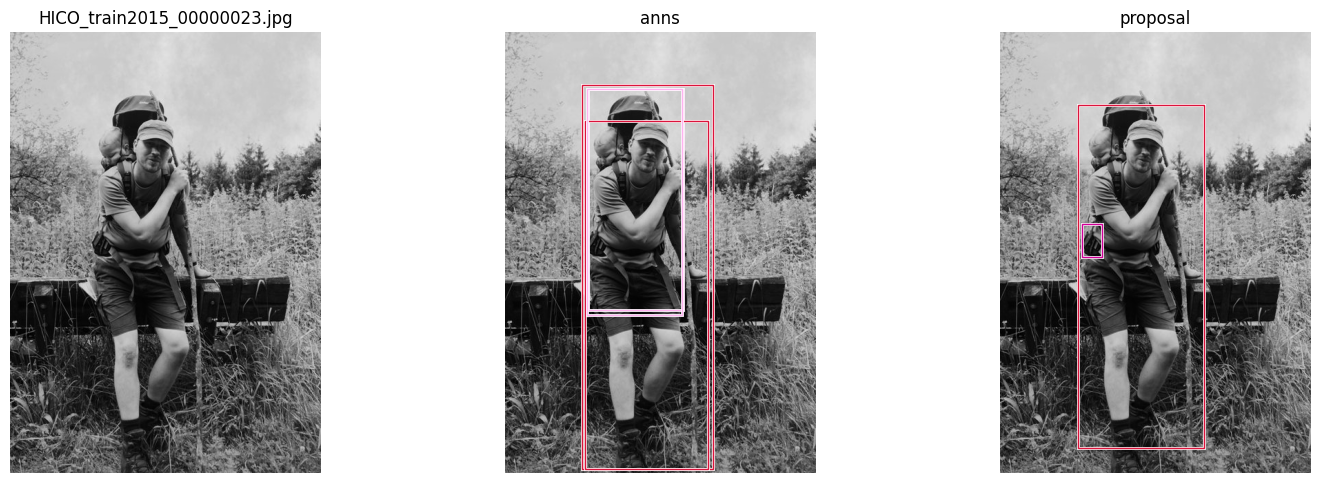

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.tight_layout()
axs[0].imshow(image)
axs[0].set_title(img_info['file_name'])
axs[0].axis('off')
axs[1].imshow(image)
axs[2].imshow(image)
watch(coco_ins_train.imgToAnns[img_id], axs[1], ins_categories, title='anns', with_name=False)  # 
watch(preds2anns(preds_train_ins_5), axs[2], ins_categories, title='proposal', with_name=False)  # 
# watch(preds2anns(preds_train_ins_2), axs[2], ins_categories, title='proposal', with_name=False)  # 

In [13]:
pprint(coco_ins_train.imgToAnns[img_id], compact=True, width=120)

[{'area': 425, 'bbox': [566, 1, 25, 17], 'category_id': 1, 'id': 179208, 'image_id': 34552},
 {'area': 420, 'bbox': [521, 93, 15, 28], 'category_id': 1, 'id': 179209, 'image_id': 34552},
 {'area': 560, 'bbox': [581, 22, 20, 28], 'category_id': 1, 'id': 179210, 'image_id': 34552},
 {'area': 575, 'bbox': [536, 114, 23, 25], 'category_id': 1, 'id': 179211, 'image_id': 34552},
 {'area': 696, 'bbox': [547, 293, 29, 24], 'category_id': 1, 'id': 179212, 'image_id': 34552},
 {'area': 700, 'bbox': [13, 49, 25, 28], 'category_id': 1, 'id': 179213, 'image_id': 34552},
 {'area': 782, 'bbox': [439, 254, 34, 23], 'category_id': 1, 'id': 179214, 'image_id': 34552},
 {'area': 780, 'bbox': [533, 20, 30, 26], 'category_id': 1, 'id': 179215, 'image_id': 34552},
 {'area': 810, 'bbox': [571, 80, 30, 27], 'category_id': 1, 'id': 179216, 'image_id': 34552},
 {'area': 825, 'bbox': [564, 119, 25, 33], 'category_id': 1, 'id': 179217, 'image_id': 34552},
 {'area': 874, 'bbox': [247, 291, 23, 38], 'category_id': 

In [13]:
pprint(coco_rel_train.imgToAnns[img_id], compact=True, width=120)

[{'category_id': 9, 'id': 51, 'image_id': 23, 'object_id': 94, 'subject_id': 93},
 {'category_id': 115, 'id': 52, 'image_id': 23, 'object_id': 96, 'subject_id': 95}]


In [14]:
pprint(coco_pasta_train.imgToAnns[img_id], compact=True, width=120)

[{'category_id': '7-0', 'id': 109, 'image_id': 23, 'rel_ann_id': 51},
 {'category_id': '8-0', 'id': 110, 'image_id': 23, 'rel_ann_id': 51},
 {'category_id': '7-0', 'id': 111, 'image_id': 23, 'rel_ann_id': 52},
 {'category_id': '8-0', 'id': 112, 'image_id': 23, 'rel_ann_id': 52}]


In [115]:
rel_categories[66]

{'id': 66, 'name': 'pet'}

In [14]:
for id, score, bbox in zip(preds_train_ins_5['labels'], preds_train_ins_5['scores'], preds_train_ins_5['bboxes']):
    print(f'{score:.2f}', ins_categories[ins_label2cat[id]], bbox)

0.99 {'supercategory': 'person', 'id': 1, 'name': 'person'} [543.49603   0.      639.4439  256.46844]
0.90 {'supercategory': 'person', 'id': 1, 'name': 'person'} [  5.6960073   3.992618  196.17502   500.84918  ]
0.85 {'supercategory': 'person', 'id': 1, 'name': 'person'} [531.1599   0.     637.1618 592.2198]
0.81 {'supercategory': 'animal', 'id': 18, 'name': 'dog'} [ 39.79912  72.54671 630.1882  592.59235]
0.66 {'supercategory': 'person', 'id': 1, 'name': 'person'} [ 13.845351  12.546322 629.59454  590.5277  ]


In [22]:
ins_categories[ins_label2cat[56]]

{'supercategory': 'furniture', 'id': 62, 'name': 'chair'}

In [23]:
ins_categories[56]

{'supercategory': 'food', 'id': 56, 'name': 'broccoli'}

### test

In [8]:
proposals_test = load('../../proposals/ViPLO/proposal_viplo_test.pkl')

In [36]:
img_id = 989 #  
# img_id = test_img_ids[1000]
img_info = coco_ins_test.loadImgs(img_id)[0]
image = plt.imread(os.path.join(test_img_root, img_info['file_name']))

In [37]:
preds_test = proposals_test[img_info['file_name']]
preds_test_ins = preds_test['instances']
# preds_test_pose = preds_test['person_keypoints']

In [38]:
score_5 = preds_test_ins['scores'] > 0.5
preds_test_ins_5 = {key: value[score_5] for key, value in preds_test_ins.items()}
score_2 = preds_test_ins['scores'] > 0.3
preds_test_ins_2 = {key: value[score_2] for key, value in preds_test_ins.items()}

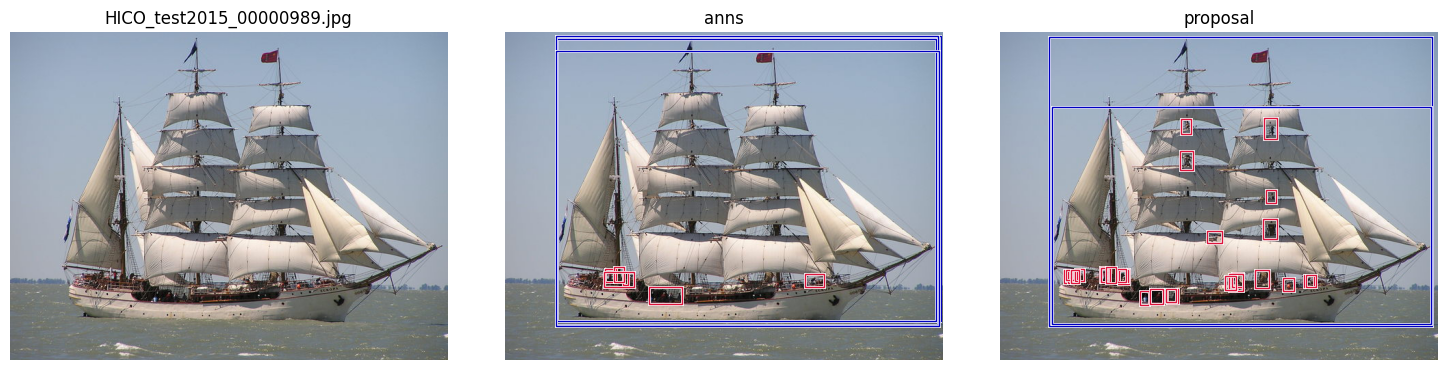

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.tight_layout()
axs[0].imshow(image)
axs[0].set_title(img_info['file_name'])
axs[0].axis('off')
axs[1].imshow(image)
axs[2].imshow(image)
watch(coco_ins_test.imgToAnns[img_id], axs[1], ins_categories, title='anns', with_name=False)  # 
watch(preds2anns(preds_test_ins_5), axs[2], ins_categories, title='proposal', with_name=False)  # 
# watch(preds2anns(preds_test_ins_2), axs[2], ins_categories, title='proposal', with_name=False)  # 

In [13]:
pprint(coco_ins_test.imgToAnns[img_id], compact=True, width=120)

[{'area': 34875, 'bbox': [545, 103, 93, 375], 'category_id': 1, 'id': 24107, 'image_id': 4219},
 {'area': 7521, 'bbox': [409, 182, 109, 69], 'category_id': 79, 'id': 24108, 'image_id': 4219}]


In [14]:
pprint(coco_rel_test.imgToAnns[img_id], compact=True, width=120)

[{'category_id': 58, 'id': 14025, 'image_id': 4219, 'object_id': 24108, 'subject_id': 24107}]


In [72]:
rel_categories[55]

{'id': 55, 'name': 'make'}

In [35]:
for id, score, bbox in zip(preds_test_ins_5['labels'], preds_test_ins_5['scores'], preds_test_ins_5['bboxes']):
    print(f'{score:.2f}', ins_categories[ins_label2cat[id]], bbox)

0.97 {'supercategory': 'person', 'id': 1, 'name': 'person'} [300.24472 194.56516 314.04163 221.62793]
0.94 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'} [233.89745  94.13576 338.11237 241.6716 ]
0.91 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'} [237.07074 208.57645 335.20215 239.41391]
0.90 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'} [356.2788  130.51573 441.6504  214.39601]
0.88 {'supercategory': 'person', 'id': 1, 'name': 'person'} [210.58694 186.35631 221.03647 200.7904 ]
0.87 {'supercategory': 'person', 'id': 1, 'name': 'person'} [298.60147 194.95639 311.8507  221.22717]
0.85 {'supercategory': 'person', 'id': 1, 'name': 'person'} [281.56845 207.47324 293.18076 222.67618]
0.84 {'supercategory': 'person', 'id': 1, 'name': 'person'} [281.7968  208.17426 293.3499  223.33551]
0.81 {'supercategory': 'person', 'id': 1, 'name': 'person'} [204.26796 186.3332  214.87502 201.46179]
0.81 {'supercategory': 'person', 'id': 1, 'name': 'person'} [312.27054 204.49312 323.

In [279]:
preds_test_ins_2

{'bboxes': array([[3.2199757e+00, 1.7172106e-01, 1.1858986e+02, 8.5974335e+01],
        [6.8908343e+00, 0.0000000e+00, 1.5984903e+02, 2.0715210e+02],
        [2.0101675e+02, 4.3991544e+02, 3.4564590e+02, 6.1267407e+02],
        [6.3140841e+00, 3.0837999e+01, 3.3109210e+02, 2.8321014e+02],
        [0.0000000e+00, 1.0344519e+02, 3.2938199e+02, 2.1435367e+02],
        [4.6908035e+00, 7.3452425e+00, 1.9458643e+02, 1.4971100e+02],
        [2.0650723e+02, 4.3892935e+02, 3.3846835e+02, 6.1179181e+02]],
       dtype=float32),
 'scores': array([0.7155148 , 0.7524894 , 0.5148268 , 0.40767965, 0.9639018 ,
        0.71605605, 0.5657009 ], dtype=float32),
 'labels': array([ 0,  0, 41, 43, 43, 46, 75])}

In [ ]:
ins_categories[ins_label2cat[11]]

{'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}

In [74]:
ins_categories[51]

{'supercategory': 'kitchen', 'id': 51, 'name': 'bowl'}